In [1]:
import sys 
sys.path.append("./modules/")
from markov import *
from mva import *

In [2]:
# variables

alpha = 0.8
beta = 0.2
u1 = 15
u2 = 75
thinkTime = 5000
timeSlice = 3
Sio1 = 40
Sio2 = 180
qio1 = 0.65 #route to io1
qio2 = 0.25 # route to io2
qoutd = 0.1*0.4 #go to delay station
qouts = 0.1*0.6 # renter the system

In [3]:
matrix = np.array([
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0.004,0.006,0.9,0.065,0.025],
    [0,0,1,0,0],
    [0,0,1,0,0]],np.dtype('d'))


mva = MVA(matrix,[5000,0,2.7,40,180],[StationType.Delay,StationType.LoadIndependent,StationType.LoadIndependent,StationType.LoadIndependent,StationType.LoadIndependent],30)


def produce_graph_and_save(dataframe: pd.DataFrame, name:str, yaxis:str, log:bool = False):
    fig = plt.line(dataframe,y=["CPU","SWAP_IN","IO1","IO2"], x="N",title=name,log_y=log)
    fig.update_yaxes(title_text=yaxis)
    #data = fig.to_image("png")
    #f = open("./Images/{}.png".format(name),"+wb")
    #f.write(data)
    #f.close()
    fig.show()
pass

mva()

utilization = mvaToDataframe(mva.utilizations)
throughputs = mvaToDataframe(mva.throughputs)
meanWaits = mvaToDataframe(mva.meanwaits)
meanClients = mvaToDataframe(mva.meanclients)


In [4]:
produce_graph_and_save(utilization,"Utilizations_markov","B/T")

In [5]:
produce_graph_and_save(meanWaits,"meanWaits_markov","ms",True)

In [6]:
produce_graph_and_save(meanClients,"meanClients_markov","n")

In [7]:
produce_graph_and_save(throughputs,"throughputs_markov","C/T")

legend (Delay_station,CPU.Stage,IO1,IO2)


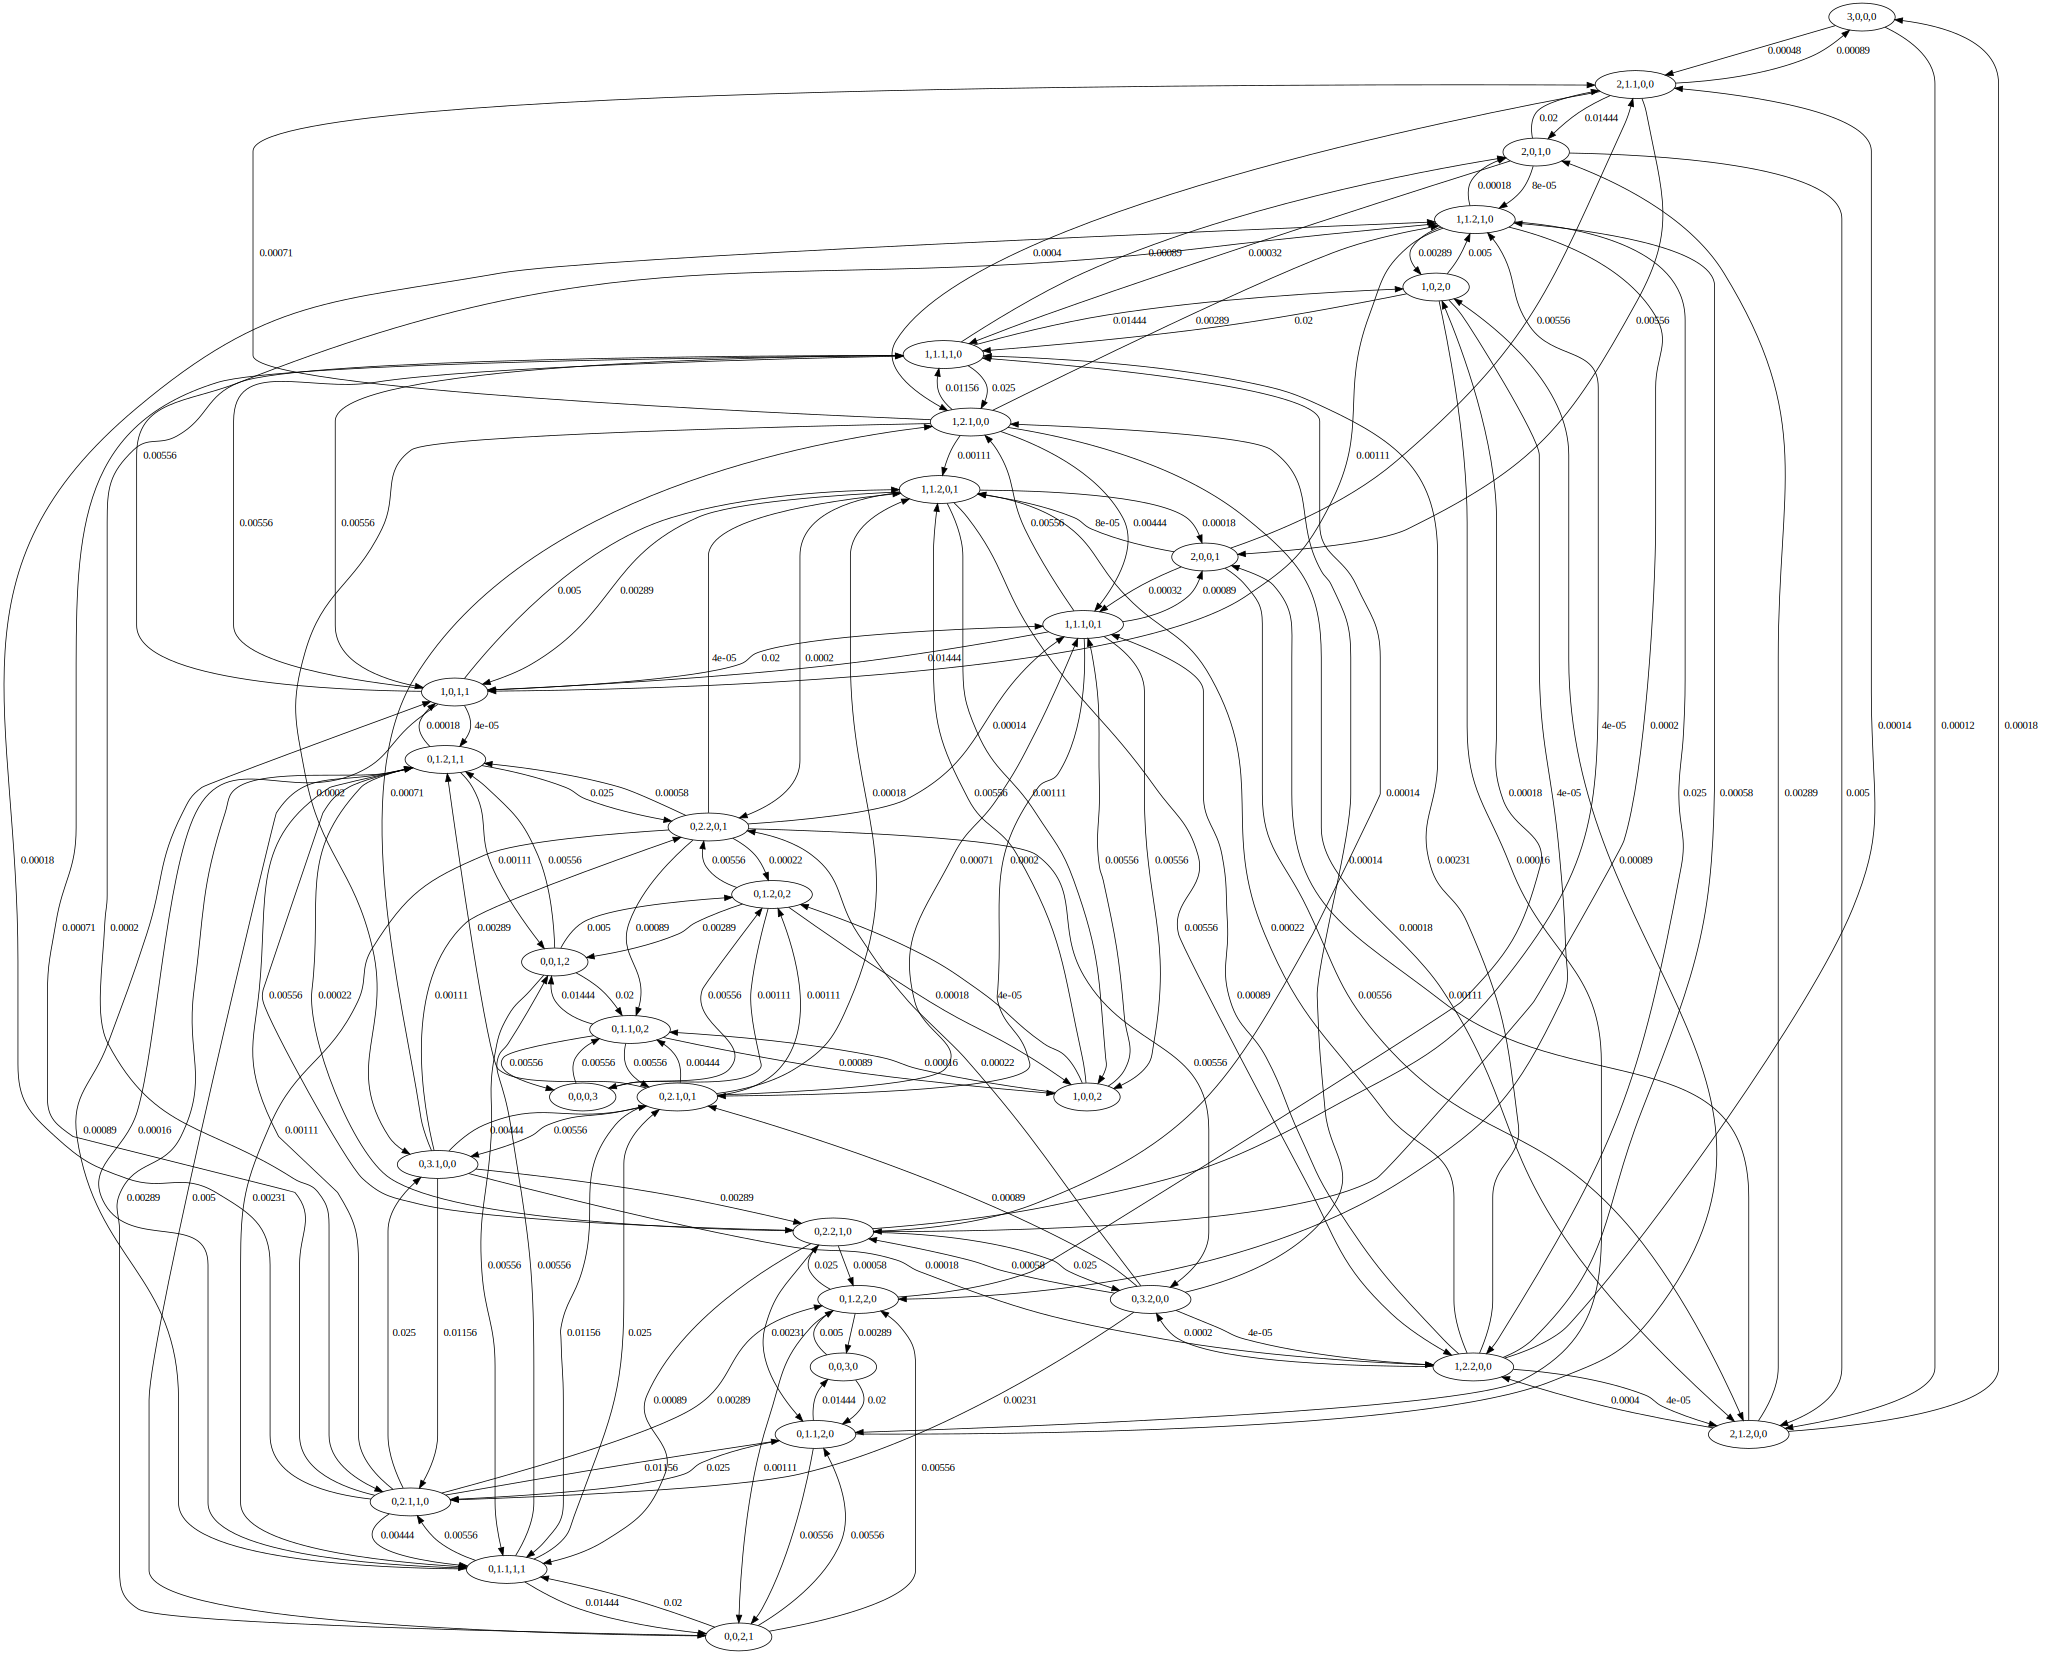

In [8]:
generator = ChainGenerator(node_enumerator())
generator(State(3,0,0,0))
chain = generator.chain()
Printer.nx_to_graphviz(chain)

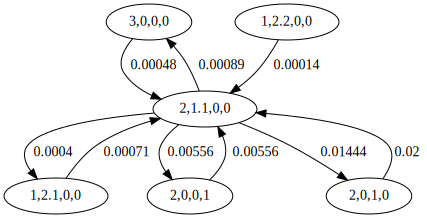

In [9]:
graph=  generator.subgraph(State(2,1,0,0,1))

Printer.nx_to_graphviz(graph)

In [10]:

q = balance_ctmc(get_adj_matrix(generator))
print(q)


[[-1.070e-03  8.900e-04  1.800e-04  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 4.800e-04 -2.689e-02  0.000e+00  7.100e-04  5.560e-03  2.000e-02
   1.400e-04  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 1.200e-04  0.000e+00 -1.090e-02  1.800e-04  5.560e-03  5.000e-03
   4.000e-05  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00 

In [11]:

dtmc = pydtmc.MarkovChain(convert_to_dtmc(q))
dtmc.pi

[array([0.00153224, 0.00304027, 0.00150137, 0.00673611, 0.0037149 ,
        0.00395013, 0.0013744 , 0.02694407, 0.00966474, 0.01194192,
        0.00511333, 0.00685888, 0.00538809, 0.04008653, 0.05163223,
        0.00901663, 0.01346305, 0.01204612, 0.01344174, 0.01577986,
        0.06112179, 0.07352737, 0.03228512, 0.04565327, 0.09310934,
        0.05797607, 0.07786243, 0.08527107, 0.10578536, 0.1241816 ])]

In [12]:

m = q.copy().transpose()

norm = np.ones(len(m))
m =np.vstack((m,norm))
b= np.zeros(len(m))
b[-1] = 1
x = np.linalg.lstsq(m,b,rcond=None)[0]

print(np.linalg.norm( (m@x) - b ,2).min())
print(x)
print(dtmc.pi[0])
print(sum(x))
print(dtmc.pi[0].sum())

8.881937753601145e-16
[0.00153224 0.00304027 0.00150137 0.00673611 0.0037149  0.00395013
 0.0013744  0.02694407 0.00966474 0.01194192 0.00511333 0.00685888
 0.00538809 0.04008653 0.05163223 0.00901663 0.01346305 0.01204612
 0.01344174 0.01577986 0.06112179 0.07352737 0.03228512 0.04565327
 0.09310934 0.05797607 0.07786243 0.08527107 0.10578536 0.1241816 ]
[0.00153224 0.00304027 0.00150137 0.00673611 0.0037149  0.00395013
 0.0013744  0.02694407 0.00966474 0.01194192 0.00511333 0.00685888
 0.00538809 0.04008653 0.05163223 0.00901663 0.01346305 0.01204612
 0.01344174 0.01577986 0.06112179 0.07352737 0.03228512 0.04565327
 0.09310934 0.05797607 0.07786243 0.08527107 0.10578536 0.1241816 ]
0.9999999999999991
1.0


In [13]:
ordered = generator.ordered
Ndelay = 0
Ncpu = 0
Nio1 = 0
Nio2 = 0


for state in ordered:
    p = x[ordered.index(state)]
    Ndelay += (state.Ndelay * p)
    Ncpu += (state.Ncpu * p)
    Nio1 += (state.Nio1 * p)
    Nio2 += (state.Nio2 * p)
    pass

print("Ndelay {} Expected {}".format(Ndelay,meanClients["DELAY"][3]))
print("Ncpu {} Expected {}".format(Ncpu,meanClients["CPU"][3]))
print("Nio1 {} Expected {}".format(Nio1,meanClients["IO1"][3]))
print("Nio2 {} Expected {}".format(Nio2,meanClients["IO2"][3]))


Ndelay 0.11196714936175503 Expected 1.857884604525876
Ncpu 0.7434078473504155 Expected 0.29853861389602415
Nio1 1.2235856923949746 Expected 0.28564336304184074
Nio2 0.9210393108928528 Expected 0.557933418536259
